<a href="https://colab.research.google.com/github/iandvecchia/adm01007/blob/main/trabalho_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importação das Bibliotecas: 
Importando as bibliotecas para o tratamento dos dados:

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sml
from sklearn.model_selection import LeaveOneOut

pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format

##2. Conexão com o Google Drive: 
Conectando o google colab com o google drive para realizar a importação dos dados:

Por conta do tamanho dos arquivos de base de dados é necessário realizar a conexão com o google drive para ter acesso aos dados.

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##3. Importação da Bases de Dados 1: 
Base de dados 1 contém dados de coleta nos postos de gasolina e também de cotação do barril de petróleo no mercado internacional.

In [90]:
df = pd.read_excel('/content/drive/MyDrive/trabalho_individual/005_base_dados.xlsx')

In [91]:
df.shape

(529424, 20)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529424 entries, 0 to 529423
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Regiao            529424 non-null  object        
 1   Estado            529424 non-null  object        
 2   Municipio         529424 non-null  object        
 3   Revenda           529424 non-null  object        
 4   CNPJ              529424 non-null  object        
 5   Rua               529424 non-null  object        
 6   Numero            529211 non-null  object        
 7   Complemento       113936 non-null  object        
 8   Bairro            527991 non-null  object        
 9   Cep               529424 non-null  object        
 10  Produto           529424 non-null  object        
 11  Data Coleta       529424 non-null  datetime64[ns]
 12  Valor Venda       529424 non-null  float64       
 13  Valor Compra      0 non-null       float64       
 14  Unid

In [93]:
df = df.drop(columns=['Valor Compra'], axis=1)

In [94]:
df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data Coleta,Valor Venda,Unidade,Bandeira,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00


##4. Calcular o preço do litro do barril de petroleo em reais:

In [95]:
df['preco_barril_por_litro_reais'] = (df['Valor Barril'] / 158.98) * df['Valor Dolar']

df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data Coleta,Valor Venda,Unidade,Bandeira,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal,preco_barril_por_litro_reais
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82


##5. Calcular o preço da gasolina descontados impostos:

In [96]:
df['valor_venda_sem_impostos'] = df['Valor Venda'] - (df['Valor Venda'] * df['Imposto Estadual'] + df['Valor Venda'] * df['Imposto Federal'])

df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data Coleta,Valor Venda,Unidade,Bandeira,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal,preco_barril_por_litro_reais,valor_venda_sem_impostos
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82,4.58
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82,3.92
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82,5.05
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.25,0.10,2.82,4.62
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA,5.68,78.98,0.17,0.00,2.82,5.08


In [97]:
df.describe()

,Valor Venda,Valor Dolar,Valor Barril,Imposto Estadual,Imposto Federal,preco_barril_por_litro_reais,valor_venda_sem_impostos
count,529424.00,529424.00,529424.00,529424.00,529424.00,529424.00,529424.00
mean,6.46,5.06,105.31,0.20,0.06,3.34,4.72
std,0.95,0.27,12.13,0.07,0.05,0.31,0.80
min,3.17,4.59,78.98,0.12,0.00,2.82,2.59
25%,5.69,4.83,95.39,0.13,0.00,3.06,4.16
50%,6.65,5.06,107.53,0.18,0.10,3.31,4.64
75%,7.15,5.24,114.24,0.26,0.10,3.59,5.14
max,9.27,5.71,127.98,0.34,0.10,4.07,7.91


##6. Quantidade de amostras por estado:

Axes(0.125,0.11;0.775x0.77)


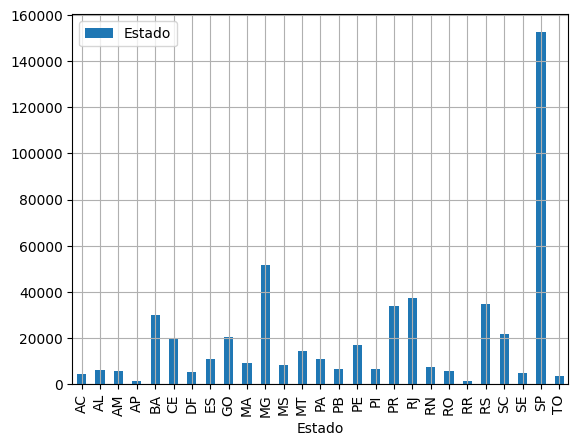

In [98]:
quantidade_por_estado = pd.DataFrame(
    df.groupby(['Estado']
    )[['Estado']].count()
)

ax = quantidade_por_estado.plot(
    kind= 'bar',
    grid=True,
)


print(ax)


##7. Quantidade de amostras por municipio:

In [99]:
quantidade_por_municipio = pd.DataFrame(
    df.groupby(['Municipio']
    )[['Municipio']].count()
)

print(quantidade_por_municipio)

                       Municipio
Municipio                       
ABAETETUBA                   487
ACAILANDIA                   334
ADAMANTINA                   608
AGUAS LINDAS DE GOIAS        545
ALAGOINHAS                   544
...                          ...
VOLTA REDONDA               1021
VOTORANTIM                   957
VOTUPORANGA                 1262
XANXERE                      393
XINGUARA                     641

[460 rows x 1 columns]


##8. Quantidade de Coletas por Produto:

Axes(0.125,0.11;0.775x0.77)


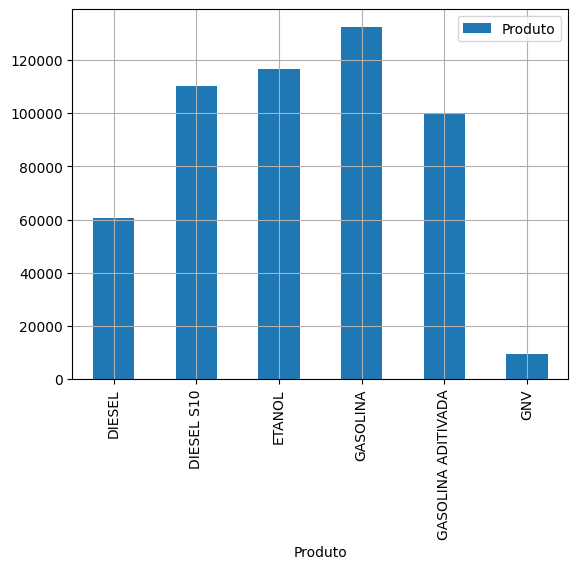

In [100]:
quantidade_por_produto = pd.DataFrame(
    df.groupby(['Produto']
    )[['Produto']].count()
)

ax = quantidade_por_produto.plot(
    kind= 'bar',
    grid=True,
)


print(ax)

##9. Valor Médio por dia:

In [101]:
valor_medio_data = pd.DataFrame(
    df.groupby(['Data Coleta']
    )[['Valor Venda', 'valor_venda_sem_impostos', 'Valor Barril', 'Valor Dolar', 'preco_barril_por_litro_reais']].mean()
)

print(valor_medio_data)

print(valor_medio_data.shape)


             Valor Venda  valor_venda_sem_impostos  Valor Barril  Valor Dolar  \
Data Coleta                                                                     
2022-01-03          5.91                      4.32         78.98         5.68   
2022-01-04          5.95                      4.30         80.00         5.68   
2022-01-05          5.88                      4.28         80.80         5.71   
2022-01-06          5.90                      4.33         81.99         5.68   
2022-01-07          6.02                      4.41         81.75         5.64   
...                  ...                       ...           ...          ...   
2022-06-24          7.15                      5.15        113.12         5.24   
2022-06-27          6.95                      5.11        115.09         5.24   
2022-06-28          6.91                      5.08        117.98         5.27   
2022-06-29          6.83                      5.02        116.26         5.18   
2022-06-30          6.73    

In [102]:
valor_medio_data.corr(method='pearson')

,Valor Venda,valor_venda_sem_impostos,Valor Barril,Valor Dolar,preco_barril_por_litro_reais
Valor Venda,1.00,0.97,0.73,-0.60,0.61
valor_venda_sem_impostos,0.97,1.00,0.72,-0.60,0.60
Valor Barril,0.73,0.72,1.00,-0.70,0.91
Valor Dolar,-0.60,-0.60,-0.70,1.00,-0.34
preco_barril_por_litro_reais,0.61,0.60,0.91,-0.34,1.00


<Axes: >

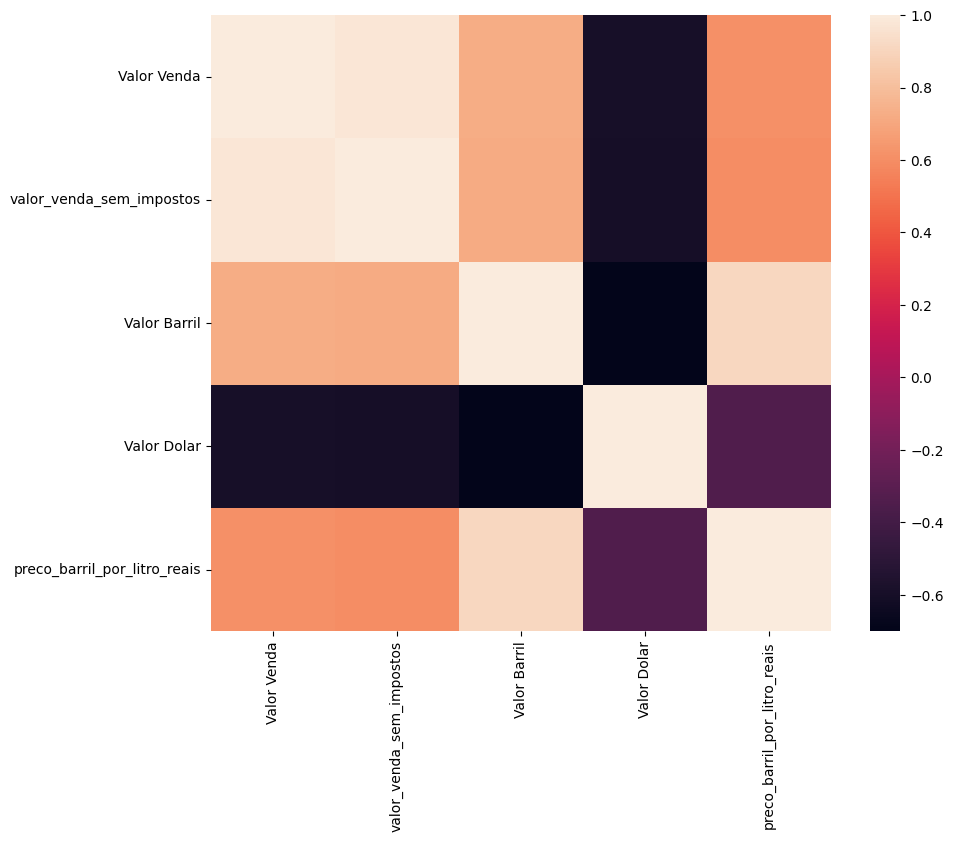

In [103]:
plt.subplots(figsize=(10,8))
sns.heatmap(valor_medio_data.corr())

In [104]:

x = valor_medio_data[['Valor Barril']]
y = valor_medio_data['Valor Venda']

regressor_OLS = sml.OLS(endog = y,exog =  x).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Valor Venda   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.877e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                   7.91e-140
Time:                        00:06:37   Log-Likelihood:                         -100.56
No. Observations:                 128   AIC:                                      203.1
Df Residuals:                     127   BIC:                                      206.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Valor Barril     0.0611      0.000    136.987      0.000       0.060       0.062
==============================================================================
Omnibus:                        9.198   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.097
Skew:                          -0.584   Prob(JB):                       0.0106
Kurtosis:                       3.586   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##10. Regressão Linear: 
Modelo de regressão Linear: 

X = Valor do Barril

Y = Valor de Venda

Regressão linear utilizando somente os dados do primeiro semestre de 2022.

[3.99471641] [[0.02346084]]
R2 DE TREINO: 0.5383734579788104
MAE DE TREINO: 0.20477011422811578
R2 DE TESTE: 0.4989578020145068
MAE DE TESTE: 0.21663589978766273


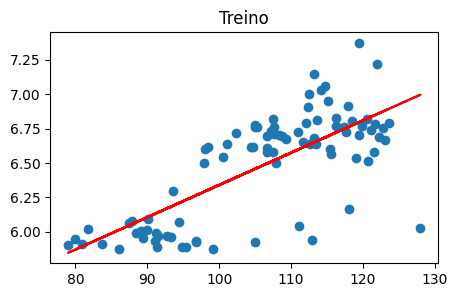

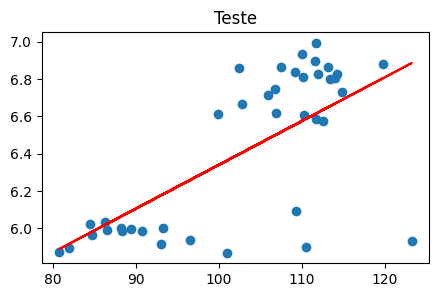

In [106]:
x= np.array(x).reshape(-1, 1)
y= np.array(y).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

print(c, m)

y_pred_train = lr.predict(x_train)

plt.subplots(figsize=(5,3))
plt.scatter(x_train, y_train)
plt.title('Treino')
plt.plot(x_train, y_pred_train, color='red')
print("R2 DE TREINO:", r2_score(y_train, y_pred_train))
print("MAE DE TREINO:", mean_absolute_error(y_train, y_pred_train))

plt.subplots(figsize=(5,3))
y_pred_test = lr.predict(x_test)
y_pred_test
plt.title('Teste')
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color='red')
print("R2 DE TESTE:", r2_score(y_test, y_pred_test))
print("MAE DE TESTE:", mean_absolute_error(y_test, y_pred_test))


##11. Importação da base de dados 2:

Adicionando dados do preço de gasolina do ano de 2021 junto dos dados de valores do preço do barril de petroleo no mercado internacional.

In [107]:
df2 = pd.read_excel('/content/drive/MyDrive/trabalho_individual/008_base_dados_2.xlsx')
print(df2)

          Data  Valor Venda  Valor Barril
0   2021-01-01         3.93         55.99
1   2021-01-02         3.69         55.99
2   2021-01-03         4.10         55.99
3   2021-01-04         4.06         51.09
4   2021-01-05         4.03         53.60
..         ...          ...           ...
411 2022-06-24         7.15        113.12
412 2022-06-27         6.95        115.09
413 2022-06-28         6.91        117.98
414 2022-06-29         6.83        116.26
415 2022-06-30         6.73        114.81

[416 rows x 3 columns]


In [108]:
df2.corr(method='pearson')

,Valor Venda,Valor Barril
Valor Venda,1.00,0.91
Valor Barril,0.91,1.00


In [109]:
x = df2[['Valor Barril']]
y = df2['Valor Venda']

regressor_OLS = sml.OLS(endog = y,exog =  x).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Valor Venda   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.472e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        00:06:38   Log-Likelihood:                         -383.06
No. Observations:                 416   AIC:                                      768.1
Df Residuals:                     415   BIC:                                      772.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Valor Barril     0.0668      0.000    186.340      0.000       0.066       0.067
==============================================================================
Omnibus:                       83.615   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.467
Skew:                          -1.161   Prob(JB):                     2.58e-32
Kurtosis:                       4.733   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O P value indica que o preço do barril de petróleo é estatisticamente significantes com relação ao preço de venda de combustíveis.
  
  A relação das variaveis: preço do barril com o valor do combustível é positiva. 

[2.33918469] [[0.03932052]]
R2 DE TREINO: 0.8092656742018056
MAE DE TREINO: 0.2742461296661374
MSE DE Treino: 0.12679329635359893
R2 DE TESTE: 0.86549619303624
MAE DE TESTE: 0.22246092233145867
MSE DE TESTE: 0.08476214650174617


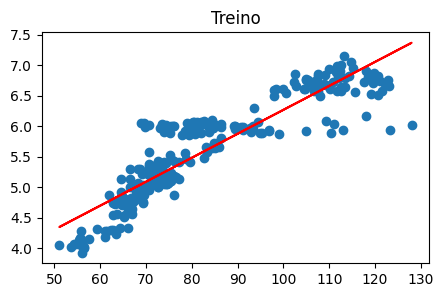

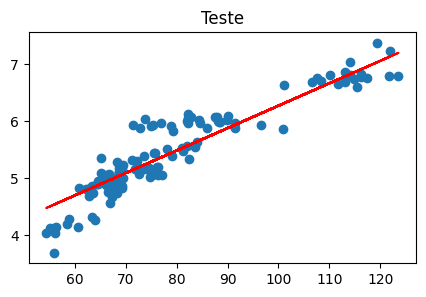

In [110]:
x= np.array(x).reshape(-1, 1)
y= np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=10)

lr = LinearRegression()
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

print(c, m)

y_pred_train = lr.predict(x_train)



plt.subplots(figsize=(5,3))
plt.scatter(x_train, y_train)
plt.title('Treino')
plt.plot(x_train, y_pred_train, color='red')
print("R2 DE TREINO:", r2_score(y_train, y_pred_train))
print("MAE DE TREINO:", mean_absolute_error(y_train, y_pred_train))
print("MSE DE Treino:", mean_squared_error(y_train, y_pred_train))

plt.subplots(figsize=(5,3))
y_pred_test = lr.predict(x_test)
y_pred_test
plt.title('Teste')
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color='red')
print("R2 DE TESTE:", r2_score(y_test, y_pred_test))
print("MAE DE TESTE:", mean_absolute_error(y_test, y_pred_test))
print("MSE DE TESTE:", mean_squared_error(y_test, y_pred_test))


##12. Reamostragem com Leave One Out: 
A métrica de erro Mean Squared Error foi superior no processo de reamostragem Leave one Out do que com Validation Set (dividindo a base em teste e treinamento). 
Por conta disso, para o desenho do modelo foi selecionado a regressão simples com a divisão da base em 70% treinamento e 30% teste.

In [111]:
x = df2[['Valor Barril']]
y = df2['Valor Venda']

x= np.array(x).reshape(-1, 1)
y= np.array(y).reshape(-1, 1)

model = LinearRegression()
loo = LeaveOneOut()
prediction_errors = []
for train_index, test_index in loo.split(x):
    #Dividindo a base em treinamento e teste:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Fit do modelo na base de treinamento
    model.fit(x_train, y_train)

    #Evoluindo o modelo na base de teste e salvado os erros de previsão:
    y_pred = model.predict(x_test)
    prediction_error = (y_pred - y_test)**2
    prediction_errors.append(prediction_error)

# Calculando Mean Squared Error
mean_squared_error = np.mean(prediction_errors)
print(f"Mean squared error: {mean_squared_error}")

Mean squared error: 0.11534689881601522


##13. Dados de Previsão: 


In [113]:
previsao_preco = lr.predict(x)
df2['previsao_preco'] = previsao_preco

print(previsao_preco)

[[4.54074044]
 [4.54074044]
 [4.54074044]
 [4.34806991]
 [4.4467644 ]
 [4.47428877]
 [4.47743441]
 [4.54074044]
 [4.52776467]
 [4.56393954]
 [4.54349288]
 [4.55764826]
 [4.50574518]
 [4.491983  ]
 [4.53720159]
 [4.54427929]
 [4.5450657 ]
 [4.51793454]
 [4.53641518]
 [4.5375948 ]
 [4.53366275]
 [4.522653  ]
 [4.53641518]
 [4.53641518]
 [4.55489583]
 [4.5985416 ]
 [4.63786212]
 [4.65280391]
 [4.67246417]
 [4.7204352 ]
 [4.74127508]
 [4.75621687]
 [4.7432411 ]
 [4.79396457]
 [4.82817342]
 [4.83013945]
 [4.86906676]
 [4.85294535]
 [4.81283842]
 [4.81283842]
 [4.90445522]
 [4.90956689]
 [4.97523215]
 [4.96894087]
 [4.93945048]
 [4.93945048]
 [4.84350842]
 [4.80458111]
 [4.85845022]
 [4.963436  ]
 [5.06645575]
 [5.06645575]
 [5.02241677]
 [4.994106  ]
 [5.0090478 ]
 [5.07707229]
 [5.06095088]
 [5.06095088]
 [5.0475819 ]
 [5.02831485]
 [5.01297985]
 [4.82738701]
 [4.87653766]
 [4.87653766]
 [4.8800765 ]
 [4.72947892]
 [4.87181919]
 [4.77509072]
 [4.87811048]
 [4.87811048]
 [4.89423189]
 [4.86